# Abstract

Una alarma de incendios es un dispositivo capaz de detectar la presencia de fuego y, en consecuencia, emitir una señal que alerte a las personas de un posible incendio. Para ello, consta de un detector que supervisa los cambios ambientales asociados con la [combustión](https://es.wikipedia.org/wiki/Combusti%C3%B3n).
Los detectores de humo más comunes suelen ser: **detectores iónicos** que tienen una corriente eléctrica constante en su sistema que disminuye en presencia de humo, y **detectores ópticos** que detectan humo por oscurecimiento o dispersión del aire.

El [autor](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset) del dataset seleccionado logró crear un detector de humo con la ayuda de dispositivos [IoT](https://es.wikipedia.org/wiki/Internet_de_las_cosas) y un modelo de IA. Para ello, se realizaron numerosas pruebas en distintas condiciones externas y con diferentes fuentes de fuego, de esa manera se garantiza una muestra heterogénea de datos para el entrenamiento de la IA. 

Las variables del dataset son:
- UTC: Tiempo Universal coordinado (tiempo en el que se llevó a cabo el experimento). 
- Temperature[C]: Temperatura de los alrededores, en Celsius.
- Humidity[%]: Humedad de ambiente.
- TVOC[ppb]: Compuestos organicos volatiles totales, en ppb. 
- eCO2[ppm]: Concentración de CO<sub>2</sub>, en ppm.
- Raw H2: Hidrógeno crudo en alrededores.
- Raw Ethanol: Etanol crudo en el ambiente.
- Pressure[hPa]: Presión atmosférica, en hPa.
- PM1.0: Partículas de diámetro menor a 1.0 micrómetros.
- PM2.5: Partículas de diámetro menor a 2.5 micrómetros.
- NC0.5: Concentración de particulas de diámetro menor a 0.5 micrómetros.
- NC1.0: Concentración de particulas de diámetro menor a 1.0 micrómetros.
- NC2.5: Concentración de particulas de diámetro menor a 2.5 micrómetros.
- CNT: Contador de prueba.
- Fire Alarm: 1 positivo,  0 no positivo. 

Para recolección de datos de entrenamiento se muestrearon muchos entornos y distintas fuentes de fuego que incluyen:

- Interiores normales
- Normal al aire libre
- Fuego de leña interior, zona de formación de bomberos
- Chimenea de gas interior, área de entrenamiento de bomberos
- Parrilla exterior de leña, carbón y gas
- Alta humedad exterior

El conjunto de datos tiene casi 60.000 lecturas.

[Fuente](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

## Hipótesis

Con la presente información se plantean las siguientes hipótesis.

1. La mayor densidad de muestras debe estar en un rango de temperatura ambiente 15-30 ºC. Esto es porque se esperaría que el detector de humo esté mejor testeado en temperaturas de funcionamiento normales. 
2. La concentración de CO<sub>2</sub> y la temperatura aumentan significativamente en presencia de un incendio.
3. La concentración de partículas PM1.0 y PM2.5, así como la concentración de compuestos orgánicos volátiles totales (TVOC), puede ser útil para determinar la presencia de un incendio.
4. La humedad relativa y la presión atmosférica pueden tener un efecto en la propagación del fuego y la generación de humo. El fuego puede disminuir la humedad relativa del aire en un área determinada.


### Definición del objetivo

Crear una IA capaz de ser utilizada como detector de incendios.

### Contexto comercial

Construir visualizaciones que ayuden a identiﬁcar patrones en incendios. 

### Problema comercial

Responder las preguntas planteadas en Hipótesis

### Contexto analítico

Se trabajará con el dataset https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset?resource=download

### Exploratory Data Analysis

Se desarrollará a continuación:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_smoke=pd.read_csv('/workspaces/codespaces-blank/Proyecto_DS/datasets/raw/smoke_detection_iot.csv')

df_smoke = df_smoke.drop('Unnamed: 0', axis='columns')
df_smoke.index = df_smoke['CNT']
df_smoke = df_smoke.drop('CNT', axis='columns')

from datetime import datetime

df_smoke['UTC'] = pd.to_datetime(df_smoke['UTC'], unit='s')
df_smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
CNT,,,,,,,,,,,,,,
0,2022-06-09 00:08:51,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,2022-06-09 00:08:52,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,2022-06-09 00:08:53,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,2022-06-09 00:08:54,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,2022-06-09 00:08:55,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [3]:
#AL PRINCIPIO EL CÓDIGO QUE ARMÉ FUE ESTE:

temperatura_2 = df_smoke['Temperature[C]'].astype(int)
temperatura_3 = list(set(df_smoke['Temperature[C]'].astype(int).tolist()))
fire = df_smoke['Fire Alarm']

k = []
on = 0
off_2 = 0
off = 0

def countOccurrence(temperatures):

  for j in temperatures:
    on = df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].sum()
    off_2= df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].count()
    off=off_2-on
    k.append([j, off_2, on, off])

  return k
  
print(countOccurrence(temperatura_3))

df = pd.DataFrame(k, columns=['Temperatura', 'Numero experimentos', 'Alarma sonó', 'Alarma no sonó'])
print(df)

[[0, 721, 586, 135], [1, 343, 279, 64], [2, 332, 270, 62], [3, 328, 267, 61], [4, 323, 263, 60], [5, 321, 260, 61], [6, 317, 259, 58], [7, 320, 260, 60], [8, 319, 259, 60], [9, 321, 212, 109], [10, 359, 186, 173], [11, 653, 263, 390], [12, 2281, 1622, 659], [13, 1478, 840, 638], [14, 1269, 724, 545], [15, 1217, 684, 533], [16, 1244, 682, 562], [17, 1369, 711, 658], [18, 2672, 1898, 774], [19, 2928, 2296, 632], [20, 4814, 3842, 972], [21, 1570, 1250, 320], [22, 1393, 1143, 250], [23, 793, 505, 288], [24, 6329, 5894, 435], [25, 3115, 2083, 1032], [26, 7119, 5326, 1793], [27, 2396, 1488, 908], [28, 1252, 16, 1236], [29, 452, 4, 448], [30, 28, 7, 21], [31, 95, 57, 38], [32, 62, 47, 15], [33, 72, 65, 7], [34, 106, 80, 26], [35, 98, 75, 23], [36, 106, 97, 9], [37, 101, 97, 4], [38, 203, 156, 47], [39, 112, 81, 31], [40, 115, 99, 16], [41, 85, 46, 39], [42, 43, 0, 43], [43, 108, 0, 108], [44, 35, 0, 35], [45, 60, 0, 60], [46, 146, 0, 146], [47, 59, 0, 59], [48, 111, 0, 111], [49, 47, 0, 47], 

In [7]:
#Pero una forma mas compacta y eficiente es usando la función groupby que se usó en las clases.

# Agrupa por temperatura y cuenta el número de experimentos y veces que suena la alarma
grouped = df_smoke.groupby('Temperature[C]').agg({'Fire Alarm': ['count', 'sum']})

# Renombra las columnas (cuenta y suma)
grouped.columns = ['Numero experimentos', 'Alarma sonó']

# Calcula el número de veces que la alarma no sonó
grouped['Alarma no sonó'] = grouped['Numero experimentos'] - grouped['Alarma sonó']

# Resetea el índice para que la columna "Temperature[C]" se convierta en una columna normal
grouped = grouped.reset_index()

# Imprime el DataFrame resultante
print(grouped)


    Temperature[C]  Numero experimentos  Alarma sonó  Alarma no sonó
0              -22                   86           69              17
1              -21                  744          606             138
2              -20                  345          280              65
3              -19                  266          217              49
4              -18                  226          183              43
..             ...                  ...          ...             ...
77              55                   92            0              92
78              56                   87            0              87
79              57                   99            0              99
80              58                   46            0              46
81              59                   64            0              64

[82 rows x 4 columns]


In [5]:
#idem que antes pero ahora temperatura es entero

df_smoke['Temperature[C]'] = df_smoke['Temperature[C]'].astype(int)

grouped = df_smoke.groupby('Temperature[C]').agg({'Fire Alarm': ['count', 'sum']})

grouped.columns = ['Numero experimentos', 'Alarma sonó']

grouped['Alarma no sonó'] = grouped['Numero experimentos'] - grouped['Alarma sonó']

grouped = grouped.reset_index()

print(grouped)


    Temperature[C]  Numero experimentos  Alarma sonó  Alarma no sonó
0              -22                   86           69              17
1              -21                  744          606             138
2              -20                  345          280              65
3              -19                  266          217              49
4              -18                  226          183              43
..             ...                  ...          ...             ...
77              55                   92            0              92
78              56                   87            0              87
79              57                   99            0              99
80              58                   46            0              46
81              59                   64            0              64

[82 rows x 4 columns]


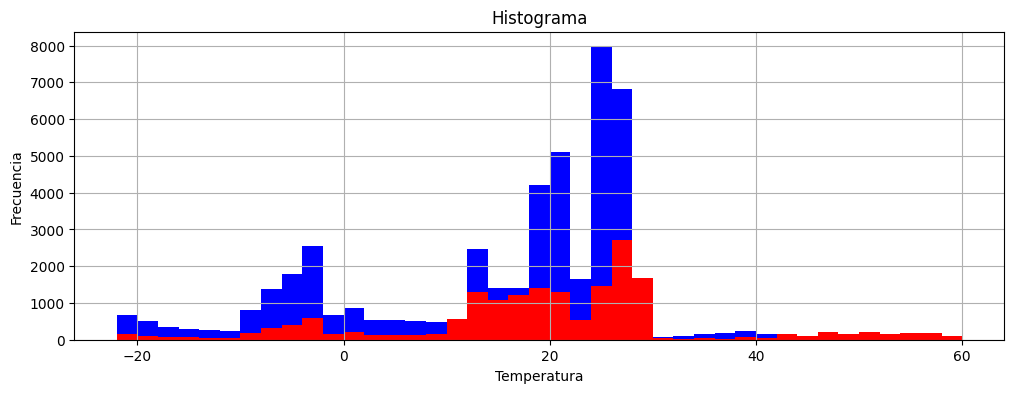

In [8]:
x = df_smoke['Temperature[C]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

#como tengo un millón de valores de x no tiene sentido que considere todos distintos cuando la variación 
# entre temperaturas es tan pequeña (aparte que no me deja matplotlib), por lo tanto agrupo las x 
# definiendo los intervalos de los bins (xmin y xmax), con las y asociadas correspondientes. 
bin_edges = np.arange(x.min(), np.ceil(x.max()) + 2, 2)

# Selecciona los valores de x correspondientes a cada intervalo
x_binned = np.digitize(x, bin_edges) - 1

hist, _ = np.histogram(x, bins=bin_edges)

fig, ax1 = plt.subplots(figsize=(12, 4))
# Crear el histograma
for i in range(len(bin_edges) - 1): 
    ax1.hist(x[(x_binned == i) & (y == 1)], bins=bin_edges, color='blue', label='Alarma sonó')
    ax1.hist(x[(x_binned == i) & (y == 0)], bins=bin_edges, color='red', label='Alarma no sonó')

ax1.set_title('Histograma')
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Temperatura')
ax1.grid('True')

plt.show()

¿Existe una relación entre la temperatura y la activación de alarma? Hacemos un análisis de correlación

In [15]:
corr = x.corr(y)

print('Coeficiente de correlación temperatura:', corr)

Coeficiente de correlación temperatura: -0.21474344468025708


Como el coeficiente de correlación es cercano al valor 0, diríamos que no existe una correlación entre la temperatura y la activación de alarma, o la misma es muy baja.

In [16]:
x = df_smoke['eCO2[ppm]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación C02:', corr)

Coeficiente de correlación C02: -0.09700610890253594


Como el coeficiente de correlación es cercano al valor 0, diríamos que no existe una correlación entre la concentración de CO<sub>2</sub> y la activación de alarma, o la misma es muy baja.

Hasta ahora la hipótesis 1 fue confirmada y la hipótesis 2 fue desechada.

In [17]:
x = df_smoke['PM1.0'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación PM1:', corr)

x = df_smoke['PM2.5'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación PM2.5:', corr)

x = df_smoke['TVOC[ppb]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación TVOC:', corr)

Coeficiente de correlación PM1: -0.11055190457734182
Coeficiente de correlación PM2.5: -0.08491638525060596
Coeficiente de correlación TVOC: -0.21474344468025708


Queda descartada la hipótesis 3

In [18]:
x = df_smoke['Humidity[%]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación Humedad:', corr)

x = df_smoke['Pressure[hPa]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

corr = x.corr(y)

print('Coeficiente de correlación presión atmosférica:', corr)

Coeficiente de correlación Humedad: 0.39984637390043054
Coeficiente de correlación presión atmosférica: 0.24979692788080604


Queda descartada la hipótesis 4.

Claramente el análisis es más complejo y mas de una condición debe cumplirse para que exista una activación de la alarma. Existe una forma de hacer un mapa de correlación de [Pearson](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) para ver si existe alguna relación entre las otras variables.

/tmp/ipykernel_1341/2215228694.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_smoke.corr()


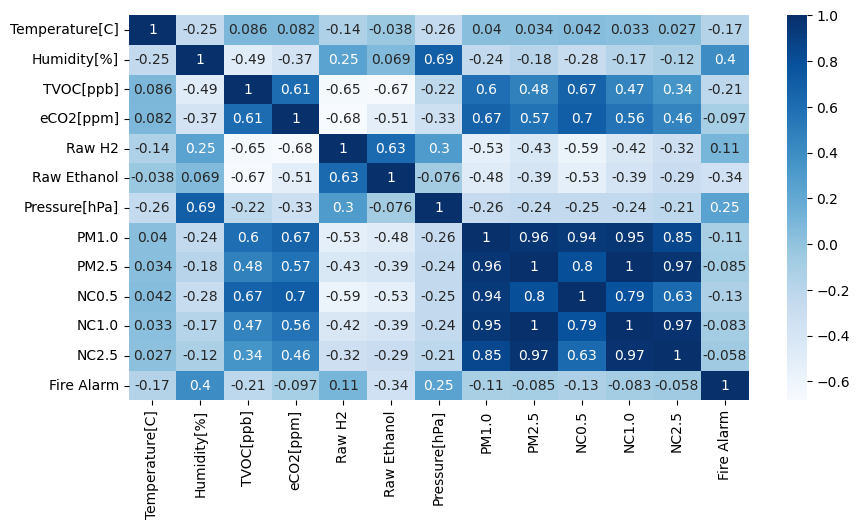

Fire Alarm    1.0
Name: Fire Alarm, dtype: float64

In [25]:
#Using Pearson Correlation
plt.figure(figsize=(10,5))
cor = df_smoke.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

#Correlation with output variable
cor_target = abs(cor['Fire Alarm'])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Confirmamos que la activación de la alarma no tiene alta correlación con ninguna de las variables. Vemos que mientras mas oscuro es el color en el mapa, mayor es la correlación entre variables. Obviamente las concentraciones de particulas PM y NC estan todas altamente correlacionadas entre sí.
Humedad y presión están medianamente correlacionadas, al igual que etanol y H<sub>2</sub> crudos. También se relacionan CO<sub>2</sub> con TVOC, PM y NC.